<a href="https://colab.research.google.com/github/niummxvy/100Day-ML-Marathon/blob/master/Day_078_HW_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (可善用 google colab)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

Wed Aug 11 16:15:25 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P8     9W /  75W |      0MiB /  7611MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
import tensorflow as tf
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
train, test = tf.keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = 2* x/255 - 1
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = tf.keras.utils.to_categorical(y, num_classes)
    return y

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[
    1024, 256, 64, 16, 4]):
    
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model



In [15]:
model_1 = build_mlp(input_shape=x_train.shape[1:])
model_1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               262400    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 64)                16448     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 16)                1040      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 4)                 68        
_________________________________________________________________
output (Dense)               (None, 10)                50  

In [16]:
model_2 = build_mlp(input_shape=x_train.shape[1:])
model_2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               262400    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 64)                16448     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 16)                1040      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 4)                 68        
_________________________________________________________________
output (Dense)               (None, 10)                50  

In [17]:
model_3 = build_mlp(input_shape=x_train.shape[1:])
model_3.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               262400    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 64)                16448     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 16)                1040      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 4)                 68        
_________________________________________________________________
output (Dense)               (None, 10)                50  

In [18]:
model_4 = build_mlp(input_shape=x_train.shape[1:])
model_4.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               262400    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 64)                16448     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 16)                1040      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 4)                 68        
_________________________________________________________________
output (Dense)               (None, 10)                50  

In [19]:
## 超參數設定
LEARNING_RATE = 0.01
EPOCHS = 100
BATCH_SIZE = 256

In [20]:
opt_1 = keras.optimizers.SGD(lr=LEARNING_RATE)
model_1.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt_1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [21]:
opt_2 = keras.optimizers.Adagrad(lr=LEARNING_RATE)
model_2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt_2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [22]:
opt_3 = keras.optimizers.Adam(lr=LEARNING_RATE)
model_3.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt_3)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [23]:
opt_4 = keras.optimizers.RMSprop(lr=LEARNING_RATE)
model_4.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt_4)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [24]:
history_1 = model_1.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 2s 7ms/step - loss: 2.3026 - accuracy: 0.1181 - val_loss: 2.2938 - val_accuracy: 0.1360
Epoch 2/100
196/196 [==============================] - 1s 6ms/step - loss: 2.2912 - accuracy: 0.1448 - val_loss: 2.2862 - val_accuracy: 0.1484
Epoch 3/100
196/196 [==============================] - 1s 6ms/step - loss: 2.2825 - accuracy: 0.1555 - val_loss: 2.2815 - val_accuracy: 0.1465
Epoch 4/100
196/196 [==============================] - 1s 6ms/step - loss: 2.2753 - accuracy: 0.1572 - val_loss: 2.2709 - val_accuracy: 0.1550
Epoch 5/100
196/196 [==============================] - 1s 5ms/step - loss: 2.2658 - accuracy: 0.1610 - val_loss: 2.2627 - val_accuracy: 0.1593
Epoch 6/100
196/196 [==============================] - 1s 6ms/step - loss: 2.2540 - accuracy: 0.1686 - val_loss: 2.2532 - val_accuracy: 0.1626
Epoch 7/100
196/196 [==============================] - 1s 6ms/step - loss: 2.2430 - accuracy: 0.1699 - val_loss: 2.2466 - val_accuracy: 0.1616

In [25]:
history_2 = model_2.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 2s 8ms/step - loss: 2.3016 - accuracy: 0.1013 - val_loss: 2.3006 - val_accuracy: 0.1071
Epoch 2/100
196/196 [==============================] - 1s 6ms/step - loss: 2.2843 - accuracy: 0.1256 - val_loss: 2.2849 - val_accuracy: 0.1182
Epoch 3/100
196/196 [==============================] - 1s 6ms/step - loss: 2.2586 - accuracy: 0.1424 - val_loss: 2.2519 - val_accuracy: 0.1512
Epoch 4/100
196/196 [==============================] - 1s 6ms/step - loss: 2.2285 - accuracy: 0.1591 - val_loss: 2.2478 - val_accuracy: 0.1585
Epoch 5/100
196/196 [==============================] - 1s 6ms/step - loss: 2.2086 - accuracy: 0.1782 - val_loss: 2.2256 - val_accuracy: 0.1599
Epoch 6/100
196/196 [==============================] - 1s 6ms/step - loss: 2.1915 - accuracy: 0.1844 - val_loss: 2.2086 - val_accuracy: 0.1706
Epoch 7/100
196/196 [==============================] - 1s 6ms/step - loss: 2.1682 - accuracy: 0.2003 - val_loss: 2.1699 - val_accuracy: 0.1967

In [26]:
history_3 = model_3.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 2s 8ms/step - loss: 3.8274 - accuracy: 0.0979 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/100
196/196 [==============================] - 1s 6ms/step - loss: 2.3030 - accuracy: 0.1017 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 3/100
196/196 [==============================] - 1s 6ms/step - loss: 2.3030 - accuracy: 0.1005 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 4/100
196/196 [==============================] - 1s 6ms/step - loss: 2.3030 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/100
196/196 [==============================] - 1s 6ms/step - loss: 2.3031 - accuracy: 0.0996 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 6/100
196/196 [==============================] - 1s 6ms/step - loss: 2.3032 - accuracy: 0.0987 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 7/100
196/196 [==============================] - 1s 6ms/step - loss: 2.3032 - accuracy: 0.0951 - val_loss: 2.3028 - val_accuracy: 0.1000

In [27]:
history_4 = model_4.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 3s 10ms/step - loss: 11.2884 - accuracy: 0.0977 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 2/100
196/196 [==============================] - 2s 8ms/step - loss: 2.3030 - accuracy: 0.0987 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 3/100
196/196 [==============================] - 2s 8ms/step - loss: 2.3032 - accuracy: 0.0968 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 4/100
196/196 [==============================] - 2s 8ms/step - loss: 2.3031 - accuracy: 0.0993 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/100
196/196 [==============================] - 2s 8ms/step - loss: 2.3030 - accuracy: 0.0994 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 6/100
196/196 [==============================] - 2s 8ms/step - loss: 2.3032 - accuracy: 0.0997 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 7/100
196/196 [==============================] - 2s 8ms/step - loss: 2.3031 - accuracy: 0.1012 - val_loss: 2.3029 - val_accuracy: 0.10

In [35]:
import matplotlib.pyplot as plt

def Visualize(history):
    plt.figure(figsize=(10,8))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Valiidation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.figure(figsize=(10,8))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Valiidation'], loc='upper left')
    plt.show()

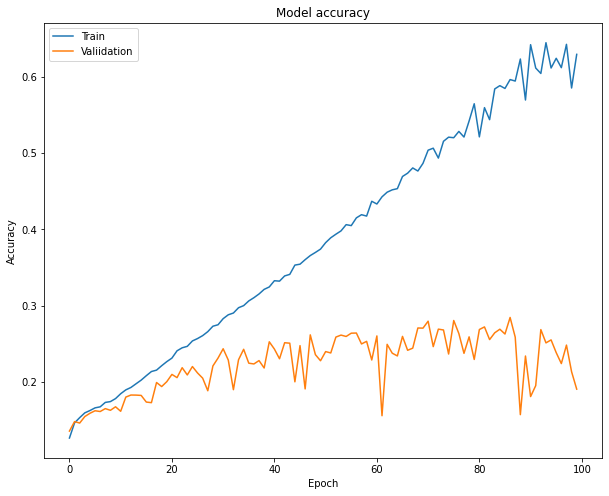

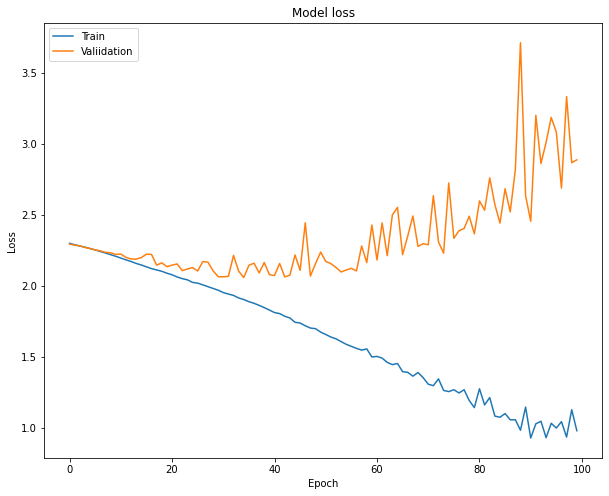

In [36]:
Visualize(history_1)

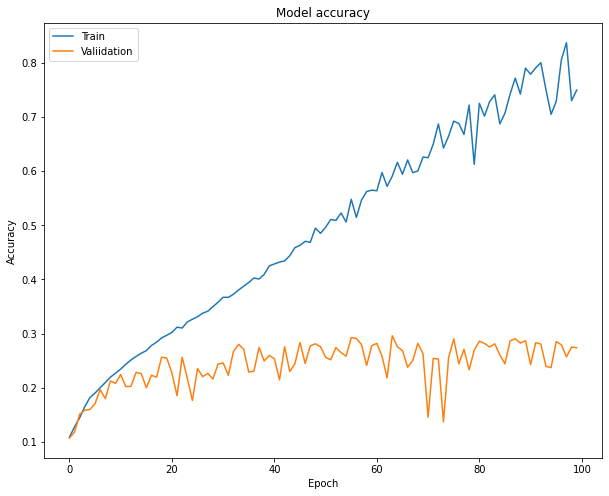

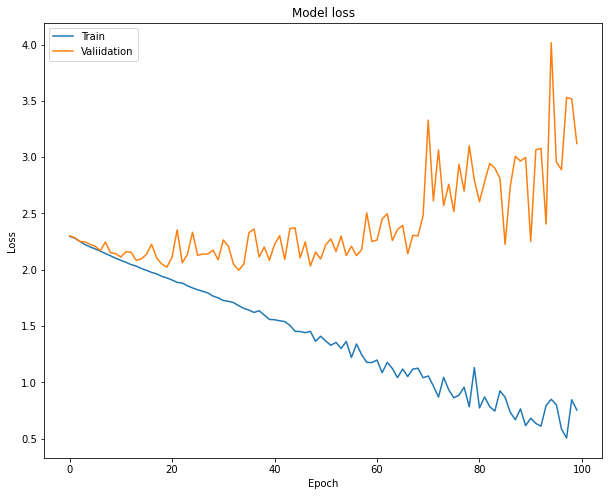

In [37]:
Visualize(history_2)

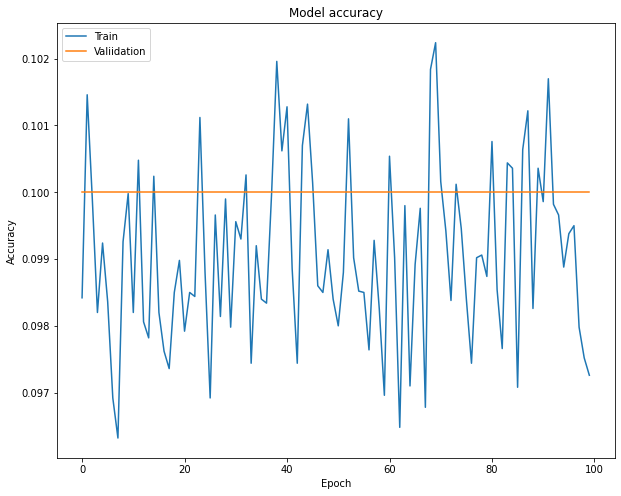

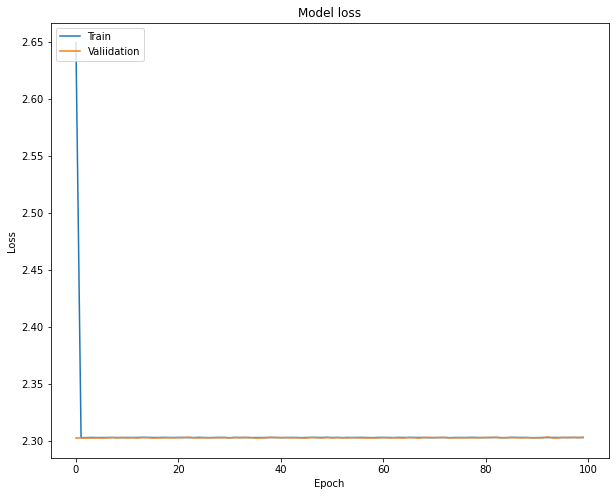

In [38]:
Visualize(history_3)

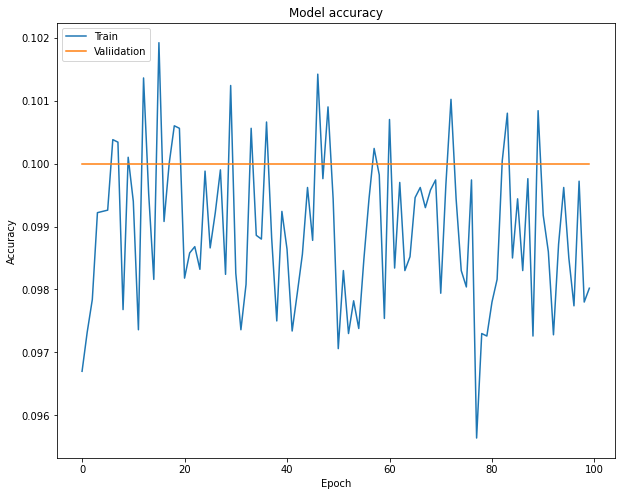

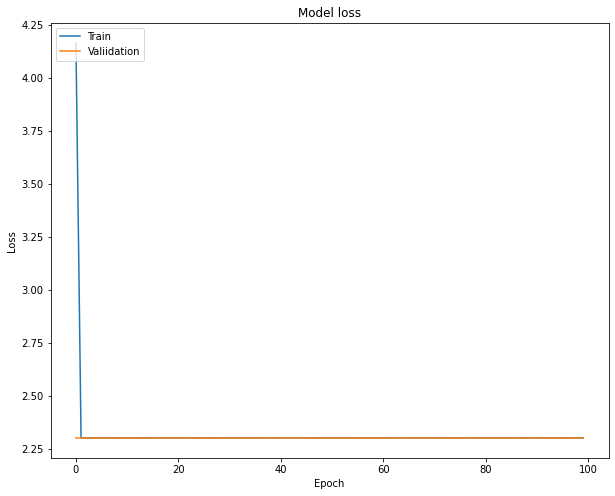

In [39]:
Visualize(history_4)